Link to Github




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# Load the dataset
thedata = pd.read_csv('StudentMentalHealth.csv')
pd.set_option('display.max_columns',None)
thedata.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
thedata.shape

(101, 11)

In [4]:
#@title MAKE A COPY

#To make sure we don't alter the OG file
data = thedata.copy()

#View the data, if there are missing values and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
#@title START DATA CLEANING

data.drop(columns=['Timestamp'], inplace=True)
data.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
#Check for missing data
#Just double checking
data.isnull().sum()

Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [7]:
#Change the column names to be more understandable/user-friendly
data.rename(columns={
    'Choose your gender': 'Gender',
    'Age': 'Age',
    'What is your course?': 'Course',
    'Your current year of Study': 'Year',
    'What is your CGPA?': 'CGPA',
    'Marital status': 'MaritalStatus',
    'Do you have Depression?': 'Depression',
    'Do you have Anxiety?': 'Anxiety',
    'Do you have Panic attack?': 'PanicAttack',
    'Did you seek any specialist for a treatment?': 'SpecialistTreatment'}, inplace=True)
data.head()

,Gender,Age,Course,Year,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,SpecialistTreatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [8]:
#Check the values
data['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

To help with categorizing, this has been used as reference https://www.kaggle.com/datasets/shariful07/student-mental-health/discussion/423900

In [9]:
# Preprocess course names and remove extra spaces
data['Course'] = data['Course'].str.strip()

# Convert course names to uppercase for consistent matching
data['Course'] = data['Course'].str.upper()

In [10]:
# Define a dictionary to map courses to categories
#WHERE RSEP = (Religion, Sociology, Ethnography, Psychology)
course_to_category = {
    'ENGINEERING': 'Engineering/IT',
    'ENGINE': 'Engineering/IT',
    'ENGIN': 'Engineering/IT',
    'BIT': 'Engineering/IT',
    'ENM': 'Engineering/IT',
    'KOE': 'Engineering/IT',
    'ACCOUNTING': 'Business',
    'BUSINESS ADMINISTRATION': 'Business',
    'BANKING STUDIES':'Business',
    'ECONS': 'Business',
    'BIOMEDICAL SCIENCE': 'Medicine',
    'NURSING': 'Medicine',
    'RADIOGRAPHY': 'Medicine',
    'LAWS': 'Law',
    'LAW': 'Law',
    'PSYCHOLOGY': 'RSEP',
    'MARINE SCIENCE': 'Environment',
    'COMMUNICATION': 'Communication',
    'FIQH FATWA': 'RSEP',
    'FIQH': 'RSEP',
    'MATHEMATHICS': 'Mathematics',
    'ISLAMIC EDUCATION': 'RSEP',
    'PENDIDIKAN ISLAM': 'RSEP',
    'BCS': 'Engineering/IT',
    'KENMS': 'Business',
    'USULUDDIN': 'RSEP',
    'TAASL': 'Linguistics',
    'ALA': 'Art',
    'BENL': 'Linguistics',
    'CTS': 'Engineering/IT',
    'ENGIN': 'Engineering/IT',
    'MHSC': 'Medicine',
    'MALCOM': 'Communication',
    'KOP': 'Business',
    'HUMAN SCIENCES': 'Business',
    'BIOTECHNOLOGY': 'Medicine',
    'DIPLOMA NURSING': 'Medicine',
    'DIPLOMA TESL': 'Linguistics',
    'IT': 'Engineering/IT',
    'HUMAN RESOURCES':'Business',
    'IRKHS': 'RSEP',
    'KIRKHS': 'RSEP'

}

# Create a new 'CourseCategory' column based on the mapping, replacing all courses
data['CourseCategory'] = data['Course'].map(course_to_category)

# Drop the original 'Course' column
data.drop('Course', axis=1, inplace=True)

# Display the first few rows of the dataset with the new 'CourseCategory' column
data.head()


,Gender,Age,Year,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,SpecialistTreatment,CourseCategory
0,Female,18.0,year 1,3.00 - 3.49,No,Yes,No,Yes,No,Engineering/IT
1,Male,21.0,year 2,3.00 - 3.49,No,No,Yes,No,No,RSEP
2,Male,19.0,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,Engineering/IT
3,Female,22.0,year 3,3.00 - 3.49,Yes,Yes,No,No,No,Law
4,Male,23.0,year 4,3.00 - 3.49,No,No,No,No,No,Mathematics


In [11]:
data1 = data.copy()

In [12]:
# Define a dictionary to map CGPA ranges to numerical values
# Preprocess course names and remove extra spaces
data['CGPA'] = data['CGPA'].str.strip()

cgpa_mapping = {
    '3.00 - 3.49': 1,
    '3.50 - 4.00': 0,
    '3.50 - 4.00 ': 0,
    '2.50 - 2.99': 2,
    '2.00 - 2.49': 3,
    '0 - 1.99': 4
}

# Use the replace method to create a new column with numerical CGPA values
data1['NumericalCGPA'] = data1['CGPA'].replace(cgpa_mapping)

# Drop the original CGPA column
data1.drop('CGPA', axis=1, inplace=True)


In [13]:
data1['NumericalCGPA'].unique()

array([1, 0, 2, 3, 4])

In [14]:
# Define a dictionary to map 'Year' to numerical values

year_mapping = {
    'year 1': 1,
    'Year 1': 1,  # Handle case variations if needed
    'year 2': 2,
    'Year 2': 2,
    'year 3': 3,
    'Year 3': 3,
    'year 4': 4,
    'Year 4': 4,
    # Add more mappings for other years if present
}

# Use the replace method to create a new column with numerical year values
data1['NumericalYear'] = data1['Year'].replace(year_mapping)

# Drop the original 'Year' column
data1.drop('Year', axis=1, inplace=True)

In [37]:
# Handling missing values (replace NaNs with the mean of the column)
data1['Age'].fillna(data1['Age'].mean(), inplace=True)
data1.isnull().sum()

Gender                 0
Age                    0
MaritalStatus          0
Depression             0
Anxiety                0
PanicAttack            0
SpecialistTreatment    0
CourseCategory         0
NumericalCGPA          0
NumericalYear          0
dtype: int64

In [ ]:
#Incase I would like to download to cleaned file
#data1.to_csv("student_data.csv", index=False)


# START EDA

In [22]:
# Display basic summary statistics
data1.describe()

,Age,NumericalCGPA,NumericalYear
count,101.000000,101.000000,101.000000
mean,20.530000,0.722772,1.970297
std,2.483767,0.939349,0.994540
min,18.000000,0.000000,1.000000
25%,18.000000,0.000000,1.000000
50%,19.000000,1.000000,2.000000
75%,23.000000,1.000000,3.000000
max,24.000000,4.000000,4.000000


In [26]:
print(data1.columns)

Index(['Gender', 'Age', 'MaritalStatus', 'Depression', 'Anxiety',
       'PanicAttack', 'SpecialistTreatment', 'CourseCategory', 'NumericalCGPA',
       'NumericalYear'],
      dtype='object')


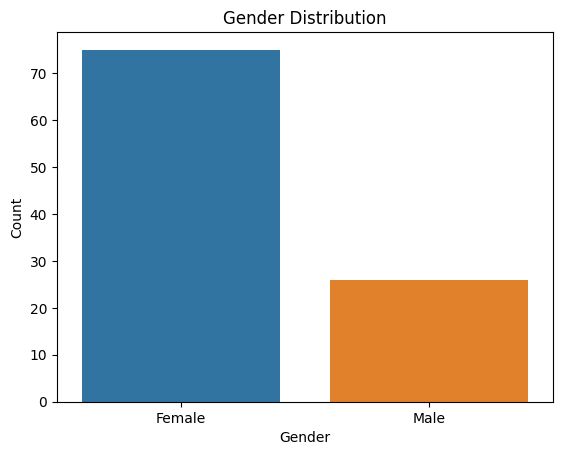

In [18]:
# Count plot that shows the distribution of gender
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [38]:
data['Gender'].value_counts()

Female    75
Male      26
Name: Gender, dtype: int64

This result indicates that there are 75 female students and 26 male students in the dataset. It's important to show this because it gives us a clear picture of the gender distribution among the students. This information can be helpful for various purposes, such as understanding the composition of the dataset, studying gender-related trends, or making decisions that may need to consider gender-specific factors.

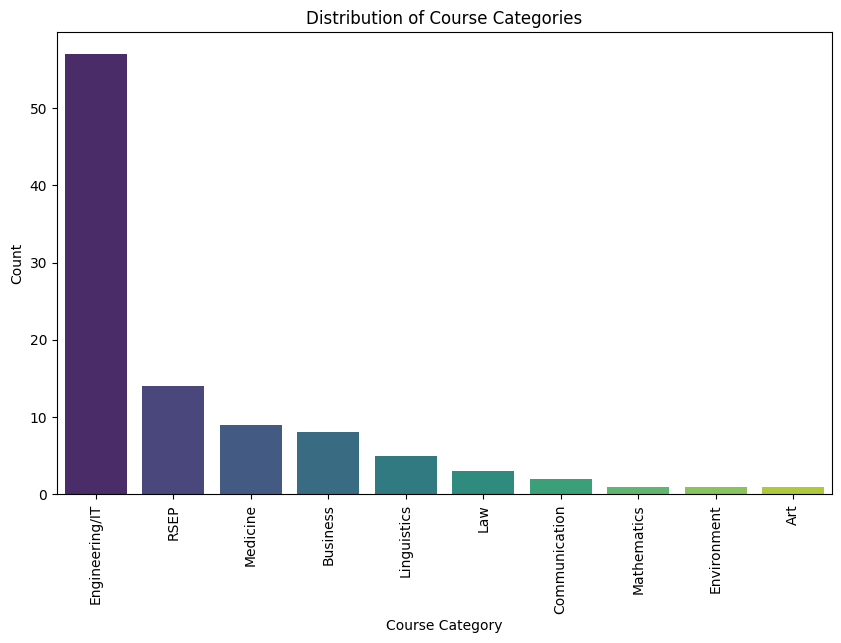

In [41]:
# Bar plot shows the distribution of students across different course categories.
plt.figure(figsize=(10, 6))
sns.barplot(x=course_counts.index, y=course_counts.values, palette="viridis")
plt.title("Distribution of Course Categories")
plt.xlabel("Course Category")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [40]:
course_counts = data['CourseCategory'].value_counts()
print(course_counts)

Engineering/IT    57
RSEP              14
Medicine           9
Business           8
Linguistics        5
Law                3
Communication      2
Mathematics        1
Environment        1
Art                1
Name: CourseCategory, dtype: int64


This bar plot shows the distribution of students across different course categories. It's important because it provides insights into the diversity of courses among the students in the dataset

This reveals that Engineering/IT: 57 course categories have more students, which more than half ofth data. This information can be valuable for understanding where the majority of data came from.

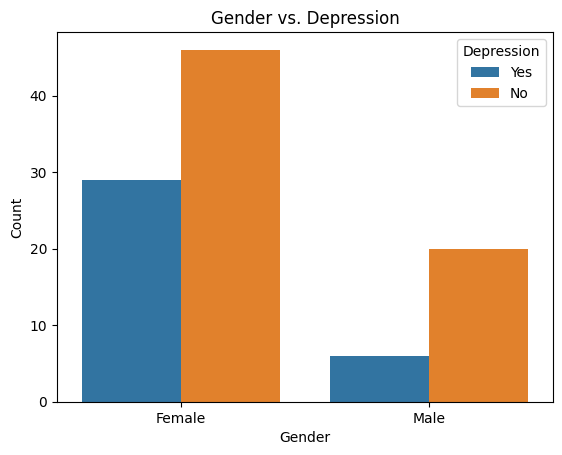

In [19]:
# Countplot to visualize the relationship between gender and depression
sns.countplot(x='Gender', hue='Depression', data=data)
plt.title("Gender vs. Depression")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [45]:
# Count the values of gender and depression
gender_depression_counts = data.groupby(['Gender', 'Depression']).size().reset_index(name='Count')

# Display the counts
print(gender_depression_counts)


   Gender Depression  Count
0  Female         No     46
1  Female        Yes     29
2    Male         No     20
3    Male        Yes      6


This  countplot shows distribution and relationship between these two variable:


*   46 females in the dataset do not report depression.

*   29 females in the dataset report experiencing depression.
*   20 males in the dataset do not report depression.


*   6 males in the dataset report experiencing depression.


This information helps us understand how many individuals from our dataset, both females and males, are affected by depression.

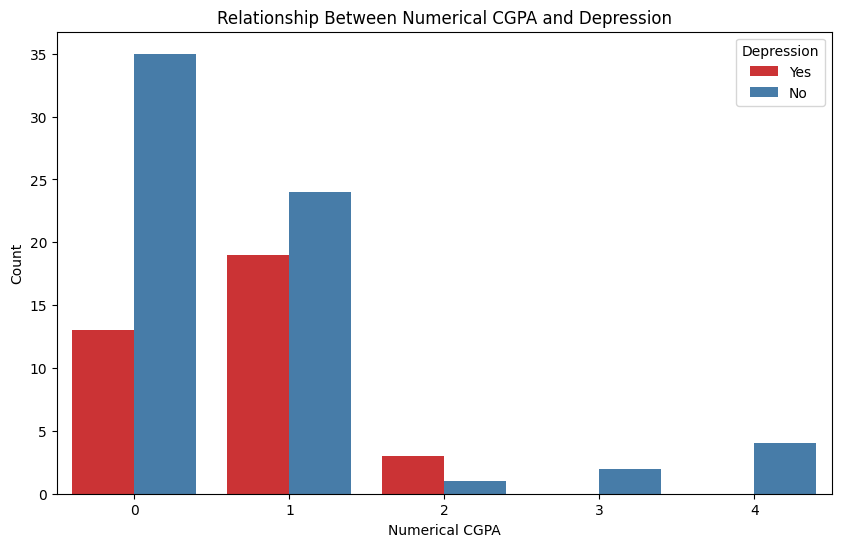

In [25]:
# Create a countplot to show the distribution of depression levels based on NumericalCGPA
plt.figure(figsize=(10, 6))
sns.countplot(x='NumericalCGPA', hue='Depression', data=data1, palette='Set1')
plt.title("Relationship Between Numerical CGPA and Depression")
plt.xlabel("Numerical CGPA")
plt.ylabel("Count")
plt.legend(title="Depression", loc='upper right')
plt.show()


   **The numerical CGPA equivalent are as follows**

*    '3.50 - 4.00': 0

*    '3.00 - 3.49': 1
*    '2.50 - 2.99': 2


*    '2.00 - 2.49': 3


*    '0 - 1.99': 4



In [46]:
count_values = data1.groupby(['NumericalCGPA', 'Depression']).size().reset_index(name='Count')
print(count_values)

   NumericalCGPA Depression  Count
0              0         No     35
1              0        Yes     13
2              1         No     24
3              1        Yes     19
4              2         No      1
5              2        Yes      3
6              3         No      2
7              4         No      4


This chart shows how depression levels are distributed among students with different Numerical CGPA categories. It helps us see if students with mid to high CGPA ranges are more likely to experience depression.


# ML MODEL

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [28]:
# %% now lets separate the label from the Training data set

#This is the prediction/testing data
y = data1['Depression']

# now we will remove the target label (Survived from the training clean data set)
df= data1.drop(['Depression'],axis=1)
df

,Gender,Age,MaritalStatus,Anxiety,PanicAttack,SpecialistTreatment,CourseCategory,NumericalCGPA,NumericalYear
0,Female,18.0,No,No,Yes,No,Engineering/IT,1,1
1,Male,21.0,No,Yes,No,No,RSEP,1,2
2,Male,19.0,No,Yes,Yes,No,Engineering/IT,1,1
3,Female,22.0,Yes,No,No,No,Law,1,3
4,Male,23.0,No,No,No,No,Mathematics,1,4
...,...,...,...,...,...,...,...,...,...
96,Female,21.0,No,Yes,No,No,Engineering/IT,0,1
97,Male,18.0,No,Yes,No,No,Engineering/IT,1,2
98,Female,19.0,Yes,No,Yes,No,Medicine,0,3
99,Female,23.0,No,No,No,No,RSEP,0,4


In [29]:
# Clean Train Data
df = df.drop(['Age','CourseCategory'],axis=1)

df.head()

,Gender,MaritalStatus,Anxiety,PanicAttack,SpecialistTreatment,NumericalCGPA,NumericalYear
0,Female,No,No,Yes,No,1,1
1,Male,No,Yes,No,No,1,2
2,Male,No,Yes,Yes,No,1,1
3,Female,Yes,No,No,No,1,3
4,Male,No,No,No,No,1,4


In [30]:
# Perform feature encoding

df = pd.get_dummies(df, columns=['Gender', 'MaritalStatus', 'NumericalCGPA','NumericalYear','Anxiety',	'PanicAttack','SpecialistTreatment'])
df

,Gender_Female,Gender_Male,MaritalStatus_No,MaritalStatus_Yes,NumericalCGPA_0,NumericalCGPA_1,NumericalCGPA_2,NumericalCGPA_3,NumericalCGPA_4,NumericalYear_1,NumericalYear_2,NumericalYear_3,NumericalYear_4,Anxiety_No,Anxiety_Yes,PanicAttack_No,PanicAttack_Yes,SpecialistTreatment_No,SpecialistTreatment_Yes
0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0
1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0
2,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
4,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0
97,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0
98,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0
99,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0


In [31]:
# Split the data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

          No       0.69      0.85      0.76        13
         Yes       0.60      0.38      0.46         8

    accuracy                           0.67        21
   macro avg       0.64      0.61      0.61        21
weighted avg       0.65      0.67      0.65        21



Accuracy: The model is right about 67% of the time.

"No" Class (No Depression):


*   The model is decent at identifying cases with "No Depression" (69% of its guesses are correct).
*   It's good at capturing most of the "No Depression" cases in the data (85% of the actual "No Depression" cases).




"Yes" Class (Yes Depression):


*   The model struggles a bit with identifying cases with "Yes Depression" (only 60% of its guesses are correct).
*   The model struggles a bit with identifying cases with "Yes Depression" (only 60% of its guesses are correct).




The misses some of the actual "Yes Depression" cases (only captures 38% of them).



*   F1-Score: It's like a balance between accuracy and capturing the right cases. For "No Depression," the balance is better (F1-score 0.76), but for "Yes Depression," it's not as good (F1-score 0.46).



So, the model is better at predicting when there's "No Depression" compared to "Yes Depression," and it's about 67% accurate overall.